<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/Fourier_Fifth_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_sample_image
from scipy.special import jv
from scipy import signal
from scipy import misc

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [4]:
hW, hH = 600,300
hFreq = 10.5
x = np.linspace( 0, 1, 2*hW)     # columns (Width)
y = np.linspace( 0, 1, 2*hH)     # rows (Height)
[X,Y] = np.meshgrid(x,y)
Sin = np.sin(hFreq * np.pi * 2 * X)
W,H = np.shape(Sin)

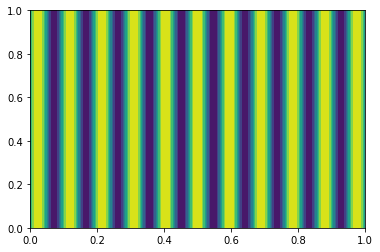

In [5]:
plt.contourf(X,Y,Sin)

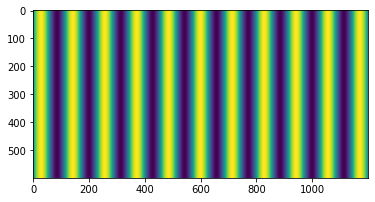

In [6]:
plt.imshow(Sin)

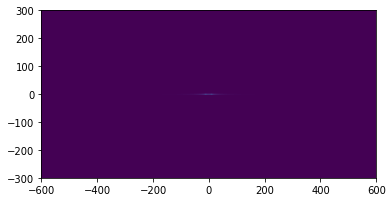

In [7]:
Fourier = np.fft.fft2(Sin)/(W*H)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier)+0.001)
plt.imshow(P, extent=[-hW,hW,-hH,hH])

In [70]:
flower = load_sample_image("flower.jpg") / 255
flower = flower[:-1,:]
flower =  rgb2gray(flower)
H, W = flower.shape

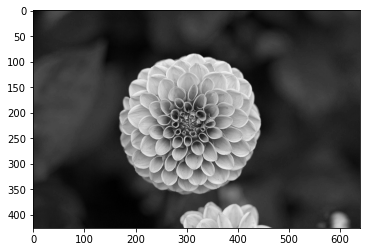

In [76]:
plt.imshow(flower, cmap='gray')
height, width = np.shape(flower)

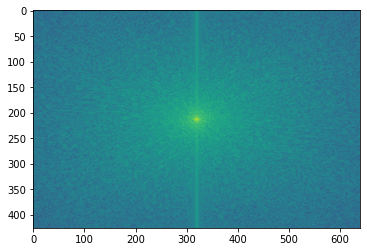

In [77]:
Fourier = np.fft.fft2(flower)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier))
plt.imshow(P)


In [78]:
def mask_creator(height, width, r): #heigth, width
  mask = np.ones((height, width))
  for i in range(height):
    for j in range(width):
      if (j-width/2)**2 + (i-height/2)**2 <r**2:
        mask[i,j] = 0

  return mask

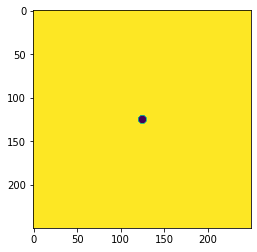

In [228]:
mask = mask_creator(250,250,5)
plt.imshow(mask)

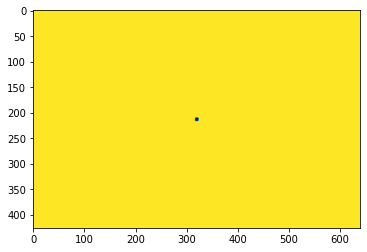

In [297]:
flower_mask = mask_creator(*flower.shape, 4)
plt.imshow(flower_mask)

In [298]:
masked_flower = Fourier * flower_mask

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


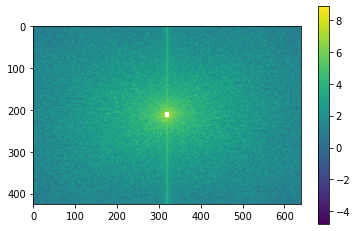

In [299]:
p = np.abs(masked_flower)
plt.imshow(np.log(p))
plt.colorbar()

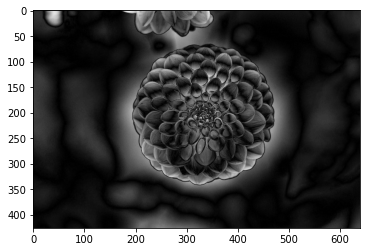

In [300]:
Flower = np.fft.fft2(masked_flower)
plt.imshow(np.abs(Flower), cmap='gray')

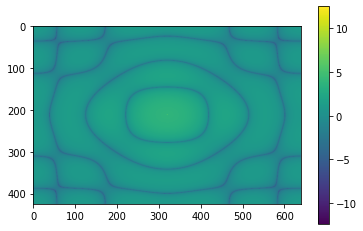

In [301]:
mask_Fourier = np.fft.fft2(flower_mask)
mask_Fourier = np.fft.fftshift(mask_Fourier)
P_mask_Fourier = np.abs(mask_Fourier)
plt.imshow(np.log(P_mask_Fourier))
plt.colorbar()

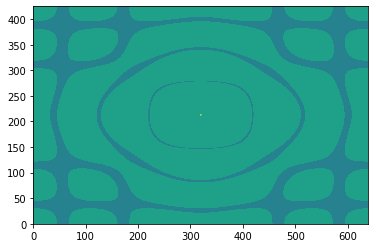

In [302]:
plt.contourf(np.log(P_mask_Fourier))

In [303]:
x = np.arange(-flower.shape[1]/2,-flower.shape[1]/2)
x.shape

(0,)

(0.0, 80.0)

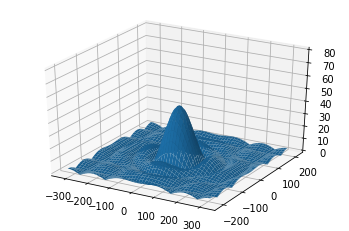

In [304]:
from mpl_toolkits.mplot3d import Axes3D
y = np.arange(-flower.shape[0]/2,flower.shape[0]/2)
x = np.arange(-flower.shape[1]/2,flower.shape[1]/2)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,P_mask_Fourier)
ax.set_zlim([0,80])

In [305]:
def mask_fourier_for_conv(a, window_size):
  x = np.linspace(-10,10,100*window_size)
  X,Y = np.meshgrid(x,x)
  J = 2 * np.pi * a**2 * jv(1,a*(np.sqrt(X**2+ Y**2)))/(a*(np.sqrt(X**2+ Y**2)) + 0.0001) 
  return J,X,Y

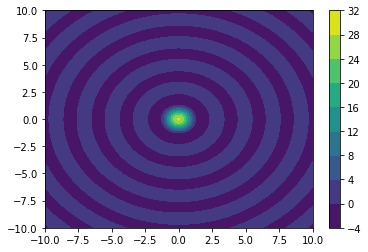

In [306]:
J,X,Y = mask_fourier_for_conv(3,10)
plt.contourf(X,Y,J)
plt.colorbar()

(-213.0, 213.0)

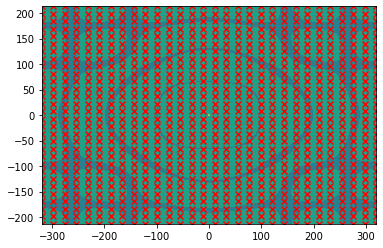

In [341]:
window_size = 30
a = 5
y = np.arange(-flower.shape[0]/2,flower.shape[0]/2)
x = np.arange(-flower.shape[1]/2,flower.shape[1]/2)
X,Y = np.meshgrid(x,y)
x_sample = np.linspace(-width/2,width/2,window_size)
y_sample = np.linspace(-height/2, height/2, window_size)
X_s, Y_s = np.meshgrid(x_sample,y_sample)
plt.contourf(X,Y,np.log(P_mask_Fourier))
plt.scatter(X_s, Y_s, marker='x', c='r')
plt.xlim(-width/2, width/2)
plt.ylim(-height/2, height/2)

In [342]:
x_sampling = x[::height//window_size]
y_sampling = y[::width//window_size]


In [343]:
sampling_indeces_x = (x[:, None] == x_sampling).argmax(axis=0)
sampling_indeces_y = (y[:, None] == y_sampling).argmax(axis=0)

In [344]:
sampling_indeces_x

array([  0,  14,  28,  42,  56,  70,  84,  98, 112, 126, 140, 154, 168,
       182, 196, 210, 224, 238, 252, 266, 280, 294, 308, 322, 336, 350,
       364, 378, 392, 406, 420, 434, 448, 462, 476, 490, 504, 518, 532,
       546, 560, 574, 588, 602, 616, 630])

In [345]:
weights = P_mask_Fourier[sampling_indeces_y][:,sampling_indeces_x]

In [346]:
X_sampling, Y_sampling = np.meshgrid(sampling_indeces_x, sampling_indeces_y)

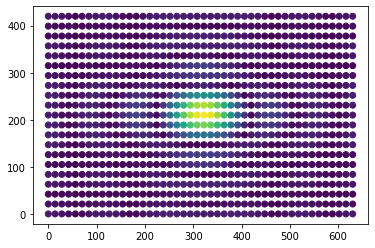

In [347]:
plt.scatter(X_sampling, Y_sampling, c = weights)

In [348]:
grad = signal.convolve2d(flower, weights, boundary='symm', mode='same')

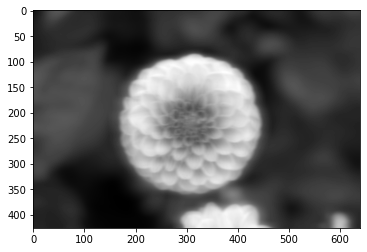

In [349]:
plt.imshow(grad, cmap="gray")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, J)